In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from fastai.vision.all import *
from ipywidgets import widgets
from IPython.display import Image

In [16]:
path=Path('/kaggle/input/pnevmoniya/train')

person = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224) # standart o'lcham
)
dls=person.dataloaders(path)




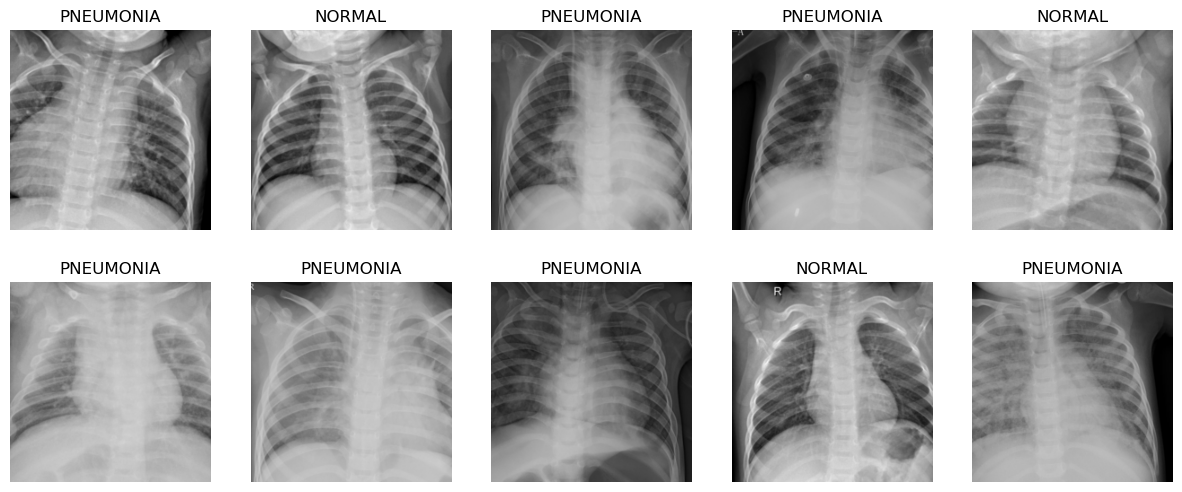

In [19]:
dls.train.show_batch(max_n=10,nrows=2)

In [22]:
model=cnn_learner(dls,resnet34,metrics=accuracy)
model.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.481094,0.201778,0.934803,01:42


epoch,train_loss,valid_loss,accuracy,time
0,0.164641,0.101712,0.968360,01:45
1,0.090889,0.075148,0.974113,01:44


In [23]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

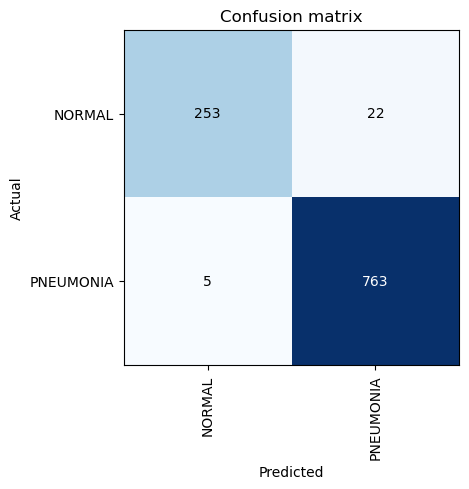

In [27]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

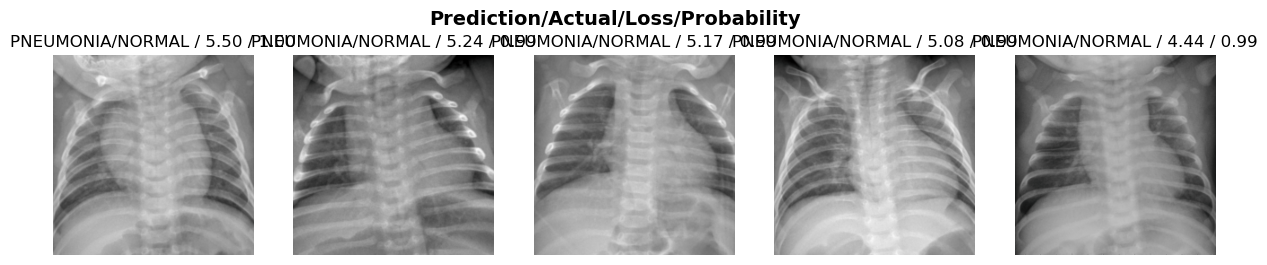

In [32]:
interp.plot_top_losses(5,nrows=1)

#### img=PILImage.create('/kaggle/input/pnevmoniya/test/test_img_10004.jpeg')
pred,id,prob=model.predict(img)
print(pred)

In [88]:
img=PILImage.create('/kaggle/input/pnevmoniya/test/test_img_10001.jpeg')
pred,id,prob=model.predict(img) 
print(pred)

PNEUMONIA


In [69]:
import os
list=[]
names=os.listdir('/kaggle/input/pnevmoniya/test/')
names.sort()
names[0]

'test_img_10001.jpeg'

In [71]:
path='/kaggle/input/pnevmoniya/test/'

In [ ]:
neondict={}
for name in names:
    pred,id,prob=model.predict(f"{path}{name}")
    neondict[name]=pred


In [90]:
import pandas as pd
df=pd.DataFrame(pd.Series(neondict))
df.reset_index(inplace=True)

In [92]:
df.columns=['id','diagnosis']

In [101]:
arr=df.diagnosis.unique()
bobdict={}
s=0
for el in arr:
    bobdict[el]=s
    s+=1
bobdict

{'PNEUMONIA': 0, 'NORMAL': 1}

In [103]:
df=df.replace(bobdict)
df.head()

,id,diagnosis
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,1
